# Alumna: Hernández Sandoval Kelly Pamela

## Ejercicio 2: Decaimiento radiactivo

Ley de decaimiento radiactivo se expresa como:


$$ \frac{dy(t)}{dt} = - \lambda y(t), 0<y<T_{max}$$ 


$$y(0)=y_0 $$ 
Siendo esta última la condición inicial

Donde $y_0$ representa la cantidad de substancia inicial, $T_{max} = h_t*N_t$ y $\lambda>0$

La solución exacta es: $y(t)=y_0e^{-\lambda t} $
 
 Aproximar el decaimiento radiactivo forward Euler y backward Euler. (a) Escribir y analizar las fórmulas de los métodos, (b), implementar los métodos en Python y mostrar el comportamiento de ambos métodos para $\lambda = 1.5$, $y_0=20$, $T_{max}=10$ y $N_t = 7,8,9,10,20$, (d) ¿cuántos puntos se necesitan para que el error sea menor que $1.0$ en cada método?
 
(a) Forward Euler
 
$y_{n+1}= y_n +h_t(-\lambda y_n)$

$y_{n+1}= y_n -h_t(\lambda y_n)$

$y_{n+1}= y(1-h_{t}\lambda)$

Donde $A=1-h_t\lambda$

Backward Euler

$y_{n+1}= y_n -h_t(\lambda y_{n+1})$

$y_{n+1}+ h_t(\lambda y_{n+1})= y_n$

$y_{n+1}(1+h_t\lambda)= y_n$


$y_{n+1}= y_n(1+h_t\lambda)^{-1}$

Donde $B=(1+h_t\lambda)^{-1}$

(d) BE= $N_t=367$, 

FE $N_t=384$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def mesh(a, b, Nt):
    """
    Función que calcula ht, el tamaño del paso de tiempo

    Parameters
    ----------
    a : inicio del dominio
    b : fin del dominio
    Nt : pasos de tiempo

    Returns
    -------
    ht : Tamaño del paso de tiempo

    """
    ht = (b-a)/Nt
    return ht

def exactSolution(t, y0 , lam):
    """
    Función que calcula la función exacta, la función analítica

    Parameters
    ----------
    t : variable independiente, tiempo
    y0 : cantidad de substancia inicial.
    lam : valor medio del número de desintegraciones por unidad de tiempo
    Returns
    -------
    función exacta variable en el tiempo
    """    
    return y0 * np.exp(- lam * t)

def forwardEuler(y, ht , lam):
    """
    Función que implementa la aproximación por el método de forward Euler    

    Parameters
    ----------
    y : aproximación a la solución del problema 
    ht : Tamaño del paso de tiempo
    lam : valor medio del número de desintegraciones por unidad de tiempo
    
    Returns
    -------
    An : Aproximación en el punto n por el método forward Euler

    """      
    A = 1 - ht* lam
    An = [A]
    for i, val in enumerate(y[0: -1]):
        y[i +1] = A * y[i]
        An.append(An[i] * A)
    return An

def backwardEuler(y, ht , lam ):
    """
    Función que implementa la aproximación por el método de backward Euler    

    Parameters
    ----------
    y : aproximación a la solución del problema 
    ht : Tamaño del paso de tiempo
    lam : valor medio del número de desintegraciones por unidad de tiempo

    Returns
    -------
    Bn : Aproximación en el punto n por el método backward Euler

    """
    B = 1 /(1 + ht*lam)
    Bn = [B]
    for i, val in enumerate (y [0: -1]):
        y[i +1] = B * y[i]
        Bn.append(Bn[i] * B)
    return Bn

In [10]:
def comparar(Nt,ht):
    """
    Función que ejecuta las demás funciones con un Nt y ht determinado

    Parameters
    ----------
    Nt : pasos de tiempo
    ht : Tamaño del paso de tiempo

    Returns
    -------
    None.

    """
    t = np.linspace(0, Tmax , Nt+1) #se determina t, considerando Tmax y Nt
    yf = np.zeros(Nt+1) #arreglo de tamaño Nt+1 para FE
    yb = np.zeros(Nt+1) #arreglo de tamaño Nt+1 para BE
    yf[0] = y0 # se determina en el arreglo el valor inicial para FE
    yb[0] = y0 # se determina en el arreglo el valor inicial para BE
    error_f = forwardEuler(yf, ht,lam ) 
    error_b = backwardEuler(yb ,ht ,lam ) 
    tl = np.linspace(0, Tmax , 100) #se determina t para la función analítica, teniendo un muestreo de 100
    y_exacta = exactSolution(tl , y0 , lam )
    y_exac_p = exactSolution(t, y0 , lam) #se obtiene la solución exacta a partir de la función analítica
    norma_error_f = np.linalg.norm(yf - y_exac_p ,2) #se determina el error consdierando la condición inicial con respecto a la función analítica
    norma_error_b = np.linalg.norm(yb - y_exac_p ,2) #se determina el error consdierando la condición inicial 
    An = forwardEuler(yf, ht, lam ) #se ejecuta la funcion para hacer aproximación por FE
    Bn = backwardEuler(yb,ht,lam) #se ejecuta la funcion para hacer aproximación por BE
    
    
    #Se define cómo se va a graficar empleando el estilo Solarize light 2
    Ecuacion = ' $y(t) = y_0 e^{\ lambda  t}$,' + '  $N_t$ ' + '= {} '.format(Nt) + \
                    ',  $h_t$ ' + '=  {:03.2f}'.format(ht)
    Error = ',Error : FE ={:10.9f}, BE ={:10.9f}'.format(norma_error_f, norma_error_b)
    plt.style.use(['Solarize_Light2'])
    fig,(ax1 , ax2 ) = plt.subplots(2 ,1)
    fig.suptitle(' Decaimiento Radioactivo ', fontsize =14)
    ax1.plot(tl, y_exacta, 'g-', lw=3, label='Sol.Exacta')
    ax1.plot(t, yf , 'C7o--', label ='Forward Euler ')
    ax1.plot(t, yb , 'C6o--', label ='Backward Euler ')
    ax1.set_title(Ecuacion + Error, fontsize=12, color ='blue')
    ax1.set_xlim(-0.5,t[-1]+0.5)
    ax1.set_ylim( -30 ,30)
    ax1.set_xlabel('$t$')
    ax1.set_ylabel('$y(t)$')
    ax1.legend(loc='upper right', ncol=1, framealpha=0.75 , fancybox=True , fontsize=10)
    ax1.grid(color='w')
    nticks = np.arange(1, Nt +1 ,1)
    ax2.plot(nticks, An[:-1], 'C7v-', label='$A^n$')
    ax2.plot(nticks, Bn[:-1], 'C6^-', label='$B^n$')
    ax2.set_xlim( -0.5 , Nt +0.5)
    ax2.set_xticks(nticks)
    ax2.set_xlabel('$n$')
    ax2.set_ylabel('$A^n$, $B^n$ ')
    ax2.legend(loc='upper right', ncol=1, framealpha=0.75 , fancybox=True , fontsize=10)
    ax2.grid( color ='w')
    plt.subplots_adjust( hspace =0.35)
    plt.savefig('decaimiento_Nt_{}.pdf'.format(Nt))
    plt.show()

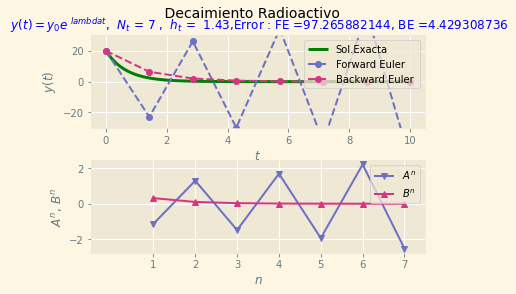

In [11]:
Nt = 7  #Pasos de tiempo
Tmax = 10 #valor máximo en x
ht = mesh(0, Tmax , Nt) #tamaño del paso de tiempo
y0 = 20 #Condición inicial
lam = 1.5 # valor medio del número de desintegraciones por unidad de tiempo

comparar(Nt,ht)


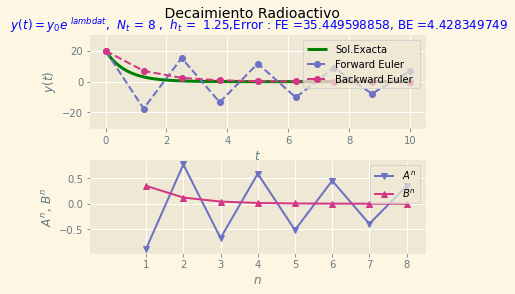

In [12]:
Nt = 8
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5

comparar(Nt,ht)


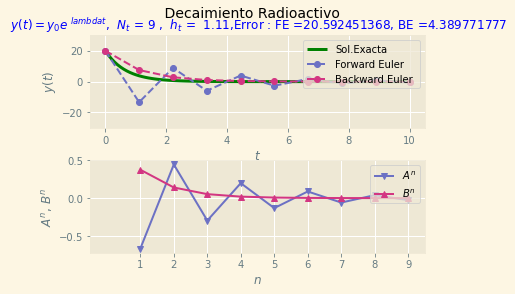

In [13]:
Nt = 9
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5

comparar(Nt,ht)


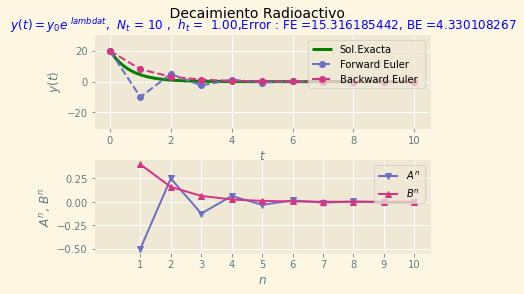

In [14]:
Nt = 10
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5

comparar(Nt,ht)


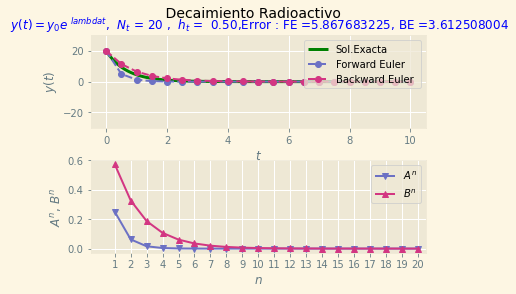

In [16]:
Nt = 20
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5

comparar(Nt,ht)


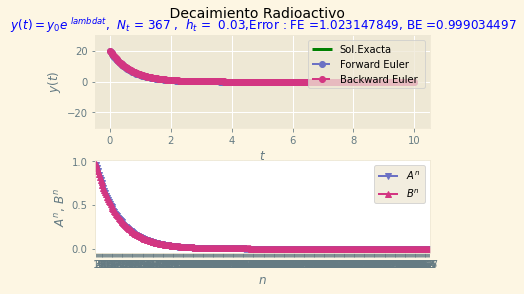

In [17]:
Nt = 367
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5

comparar(Nt,ht)


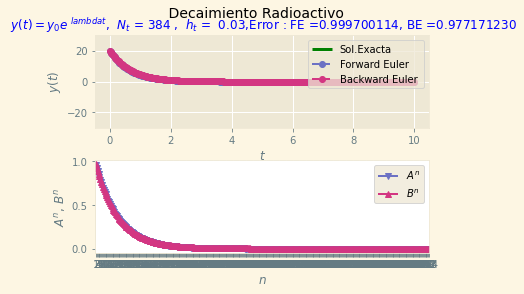

In [18]:
Nt = 384
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 1.5

comparar(Nt,ht)

#### (e) Ahora use $\lambda=2$ y contesta lo siguiente:

1. ¿Para qué valor de $N_t$ el método FE converge?A partir de $N_t=10$ comienza a estabilizarse y con $N_t=11$ es notable que existe convergencia
2. ¿Para qué valor de $N_t$ el método de FE deja de oscilar? A partir de $N_t=20$ parece estabilizarse aún más, pero a partir de $N_t=21$ ya deja de oscilar mejor y se comienza a asemejar al mpetodo BE
3. ¿Para qué valor de $N_t$ el método BE tiene un error menor a 3.0? En $N_t=45$
4. ¿Para qué valor de $N_t$ el método FE tiene un error menor a 3.0? En $N_t=68$


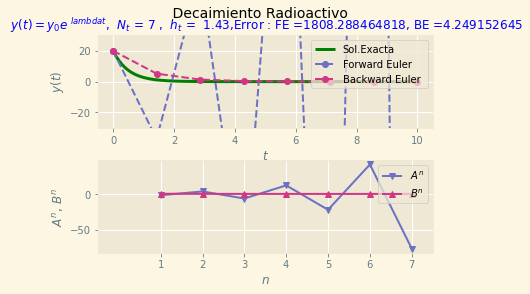

In [19]:
Nt = 7
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

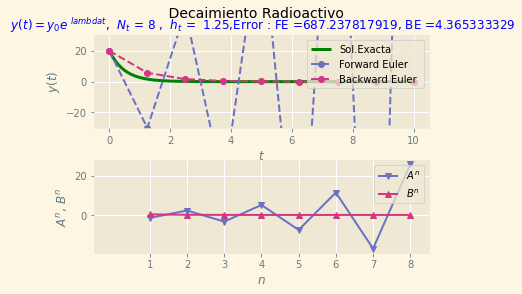

In [20]:
Nt = 8
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

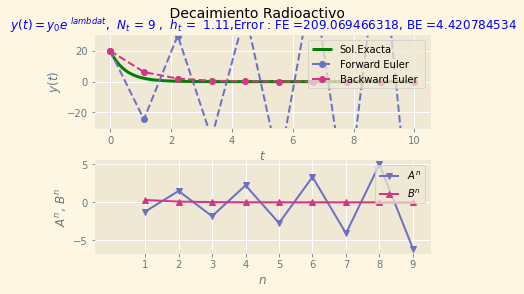

In [21]:
Nt = 9
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

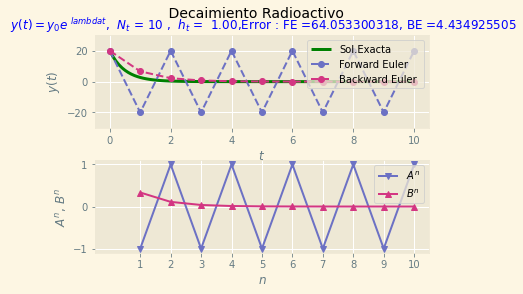

In [22]:
Nt = 10
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

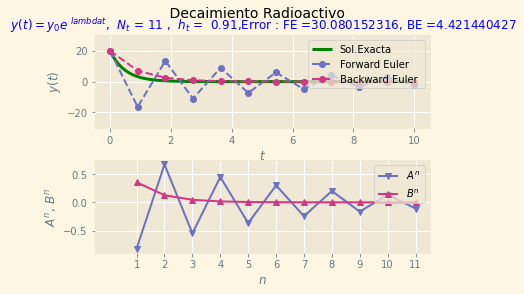

In [23]:
Nt = 11
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

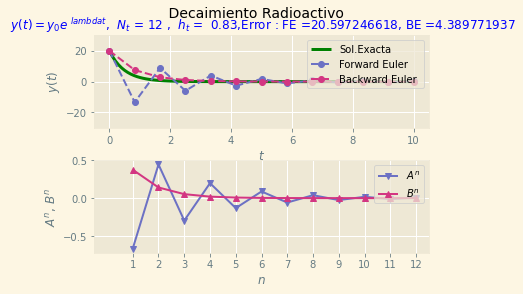

In [24]:
Nt = 12
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

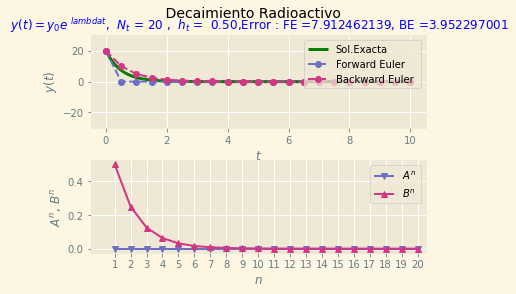

In [25]:
Nt = 20
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

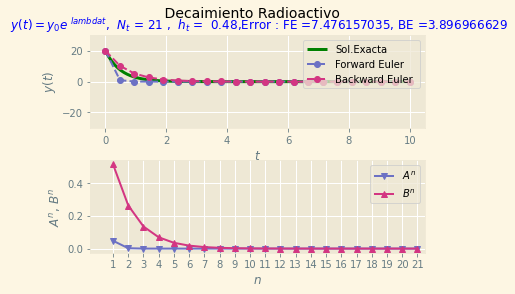

In [26]:
Nt = 21
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

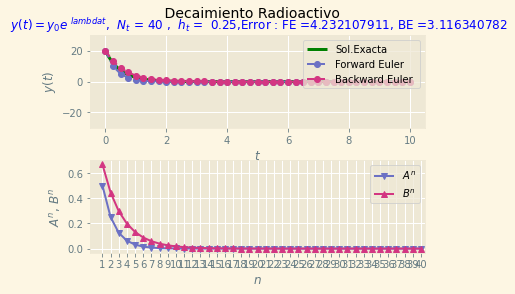

In [27]:
Nt = 40
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

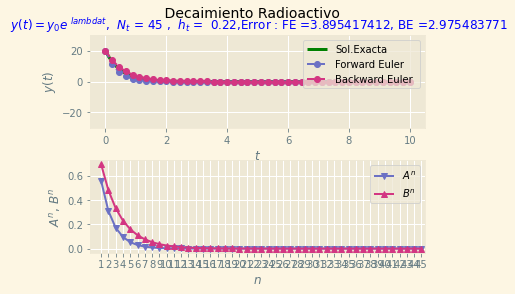

In [28]:
Nt = 45
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

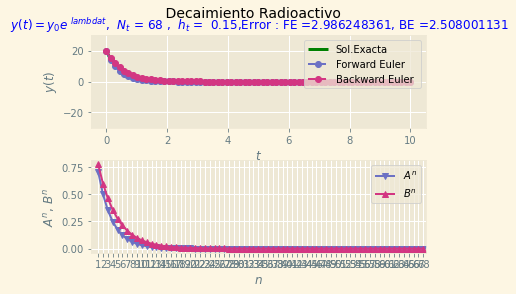

In [29]:
Nt = 68
Tmax = 10
ht = mesh(0, Tmax , Nt)
y0 = 20
lam = 2

comparar(Nt,ht)

#### (e) Ahora use $\lambda=2$ y contesta lo siguiente:

1. ¿Para qué valor de $N_t$ el método FE converge?A partir de $N_t=10$ comienza a estabilizarse y con $N_t=11$ es notable que existe convergencia
2. ¿Para qué valor de $N_t$ el método de FE deja de oscilar? A partir de $N_t=20$ parece estabilizarse aún más, pero a partir de $N_t=21$ ya deja de oscilar y se comienza a asemejar al mpetodo BE
3. ¿Para qué valor de $N_t$ el método BE tiene un error menor a 3.0? En $N_t=45$
4. ¿Para qué valor de $N_t$ el método FE tiene un error menor a 3.0? En $N_t=68$